# Exercício Prático: Classificação com Múltiplas Métricas (Capítulo 3)
Este notebook contém um exercício prático para aplicar os conceitos de classificação, avaliação de modelos e análise de erros abordados em aula.
Utilizaremos o dataset "Wine", um conjunto de dados público e pequeno com múltiplas classes.


In [91]:
# Execute esta célula para configurar o ambiente do notebook
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score

# --- Carregando o Dataset ---
# O dataset "Wine" possui 178 amostras de vinhos,
# cada uma com 13 características químicas.
# O objetivo é classificar os vinhos em uma de 3 classes (cultivares).
wine = load_wine()
X = wine.data
y = wine.target

# Separação dos conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizando os dados para melhor desempenho do SGDClassifier
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Dataset 'Wine' carregado e pronto.")
print(f"Características do treino: {X_train_scaled.shape}")
print(f"Rótulos do treino: {y_train.shape}")

Dataset 'Wine' carregado e pronto.
Características do treino: (142, 13)
Rótulos do treino: (142,)


## Parte 1: Classificação Binária
Nesta seção, vamos adaptar o problema para uma tarefa de classificação binária, onde o objetivo será apenas identificar se um vinho pertence à classe 0 ou não.

### 1.1 - Adaptar o Dataset para 2 Classes
**Sua tarefa:** Crie as variáveis `y_train_0` e `y_test_0`. Elas devem conter `True` para as amostras que são da classe 0 e `False` para as outras.
Dica: Use uma comparação booleana com `y_train` e `y_test`.



In [92]:
# ASSUMINDO QUE y_train e y_test JÁ FORAM DEFINIDOS
# E contêm os rótulos originais das classes (e.g., 0, 1, 2, ...)

# SEU CÓDIGO AQUI
y_train_0 = (y_train == 0)
y_test_0 = (y_test == 0)

print("Primeiros 5 labels do y_train_0:", y_train_0[:5])

Primeiros 5 labels do y_train_0: [False False False False  True]


### 1.2 - Treinar um Classificador Binário e Fazer uma Predição
**Sua tarefa:**
1. Crie e treine uma instância do `SGDClassifier`. Use `random_state=42` para reprodutibilidade.
2. Use o classificador treinado para prever a classe da primeira instância do conjunto de treino (`X_train_scaled[0]`).
3. Imprima a classe prevista e a classe real.

In [93]:
from sklearn.linear_model import SGDClassifier

# 1. Criar e treinar o classificador
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train_scaled, y_train)

# 2. Fazer a predição da primeira instância
predicao = sgd_clf.predict([X_train_scaled[0]])

# 3. Imprimir a classe prevista e a classe real
print("Classe prevista:", predicao[0])
print("Classe real:", y_train[0])


Classe prevista: 2
Classe real: 2


## Parte 2: Avaliação de Desempenho (Binário)

### 2.1 - Medir Acurácia com Validação Cruzada
**Sua tarefa:** Use `cross_val_score` para avaliar seu `sgd_clf` com 3 folds (`cv=3`) e a métrica de acurácia. Imprima as pontuações de cada fold.

In [94]:
from sklearn.model_selection import cross_val_score

# Avaliar o classificador com validação cruzada
acuracia_scores = cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring='accuracy')

# Imprimir as pontuações de cada fold
print("Acurácia em cada fold:", acuracia_scores)


Acurácia em cada fold: [0.95833333 0.95744681 0.95744681]


### 2.2 - Baseline com `DummyClassifier`
**Sua tarefa:** Faça o mesmo que no passo anterior, mas usando um `DummyClassifier` com a estratégia "most_frequent". Isso nos dará uma baseline para comparar. O SGD é melhor que o baseline?



In [95]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score

# Criar o classificador Dummy
dummy_clf = DummyClassifier(strategy="most_frequent")

# Avaliar com validação cruzada
acuracia_dummy = cross_val_score(dummy_clf, X_train_scaled, y_train, cv=3, scoring='accuracy')

# Imprimir os resultados
print("Acurácia (Dummy) em cada fold:", acuracia_dummy)


Acurácia (Dummy) em cada fold: [0.39583333 0.40425532 0.40425532]


### 2.3 - Matriz de Confusão, Precisão, Recall e F1-Score do SGDClassifier (binário)
**Sua tarefa:**
1. Obtenha as previsões para todo o conjunto de treino usando `cross_val_predict`.
2. Calcule e exiba a matriz de confusão.
3. Calcule e imprima a precisão, o recall e o F1-score.



In [96]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# 1. Obter previsões com validação cruzada
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)

# 2. Matriz de confusão
matriz_confusao = confusion_matrix(y_train, y_train_pred)
print("Matriz de Confusão:\n", matriz_confusao)

# 3. Métricas para problema multiclasse
precisao = precision_score(y_train, y_train_pred, average='weighted')
recall = recall_score(y_train, y_train_pred, average='weighted')
f1 = f1_score(y_train, y_train_pred, average='weighted')

print("Precisão (weighted):", precisao)
print("Recall (weighted):", recall)
print("F1-Score (weighted):", f1)


Matriz de Confusão:
 [[44  1  0]
 [ 1 53  3]
 [ 0  1 39]]
Precisão (weighted): 0.9582403511980977
Recall (weighted): 0.9577464788732394
F1-Score (weighted): 0.9577127398537567


## Parte 3: Curvas de Avaliação (Binário)

### 3.1 - Obter Scores de Decisão
**Sua tarefa:** Use `cross_val_predict` novamente, mas desta vez para obter os *scores de decisão* (`decision_function`) em vez das previsões de classe.



In [97]:
from sklearn.model_selection import cross_val_predict

# Obter scores de decisão com validação cruzada
y_scores = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3, method='decision_function')

# Exibir os primeiros 5 scores
print("Scores de decisão (primeiros 5):", y_scores[:5])


Scores de decisão (primeiros 5): [[ -65.6785192  -185.76708802   98.87998731]
 [-144.45010382  -23.84815242   54.19254207]
 [ -66.99672564   62.36970305 -161.67296785]
 [-101.73649127 -144.45876737   88.67256483]
 [  29.56970163   -4.297556   -130.12312568]]


### 3.2 - Plotar Curvas de Precisão-Recall e ROC
**Sua tarefa:**
1. Use a função `precision_recall_curve` para obter as precisões, recalls e limiares.
2. Plote a curva de Precisão vs. Recall.
3. Use a função `roc_curve` para obter a taxa de falsos positivos (fpr) e a taxa de verdadeiros positivos (tpr).
4. Plote a curva ROC.
5. Calcule e imprima a Área Sob a Curva ROC (AUC).



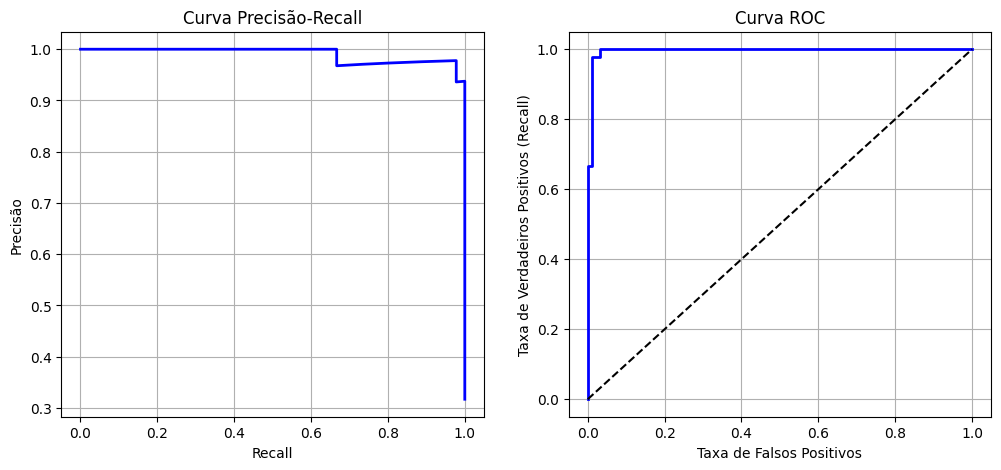

Área Sob a Curva ROC (AUC): 0.9961


In [98]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Criar vetor binário para a classe 0
y_train_0 = (y_train == 0)

# Obter scores de decisão para todas as classes (matriz)
y_scores_all = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3, method='decision_function')

# Extrair os scores da classe 0 (coluna correspondente)
y_scores_0 = y_scores_all[:, 0]

# Curva Precisão-Recall
precisions, recalls, thresholds_pr = precision_recall_curve(y_train_0, y_scores_0)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(recalls, precisions, "b-", linewidth=2)
plt.xlabel("Recall")
plt.ylabel("Precisão")
plt.title("Curva Precisão-Recall")
plt.grid(True)

# Curva ROC
fpr, tpr, thresholds_roc = roc_curve(y_train_0, y_scores_0)

plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, "b-", linewidth=2, label="SGD")
plt.plot([0, 1], [0, 1], 'k--')  # Linha de referência
plt.xlabel("Taxa de Falsos Positivos")
plt.ylabel("Taxa de Verdadeiros Positivos (Recall)")
plt.title("Curva ROC")
plt.grid(True)
plt.show()

# Área Sob a Curva ROC (AUC)
roc_auc = roc_auc_score(y_train_0, y_scores_0)
print(f"Área Sob a Curva ROC (AUC): {roc_auc:.4f}")


## Parte 4: Classificação Multiclasse e Análise de Erros

### 4.1 - Treinar o Classificador Multiclasse
**Sua tarefa:**
1. Treine uma nova instância do `SGDClassifier` (ou use a antiga), mas desta vez usando o `y_train` original, que contém todas as 3 classes.
2. Faça uma predição para a primeira instância do conjunto de treino e imprima a classe prevista e a real.



In [99]:
from sklearn.linear_model import SGDClassifier

# 1. Treinar o classificador com todas as 3 classes
sgd_clf_multiclasse = SGDClassifier(random_state=42)
sgd_clf_multiclasse.fit(X_train_scaled, y_train)

# 2. Fazer a predição da primeira instância
predicao_multiclasse = sgd_clf_multiclasse.predict([X_train_scaled[0]])

# Imprimir a classe prevista e a classe real
print("Classe prevista:", predicao_multiclasse[0])
print("Classe real:", y_train[0])


Classe prevista: 2
Classe real: 2


### 4.2 - Análise de Erros com Matriz de Confusão
**Sua tarefa:**
1. Use `cross_val_predict` para obter as previsões no conjunto de treino para o modelo multiclasse.
2. Plote a matriz de confusão normalizada (use `ConfusionMatrixDisplay.from_predictions` com `normalize='true'`).
3. Com base na matriz, identifique quais classes o modelo mais confunde.



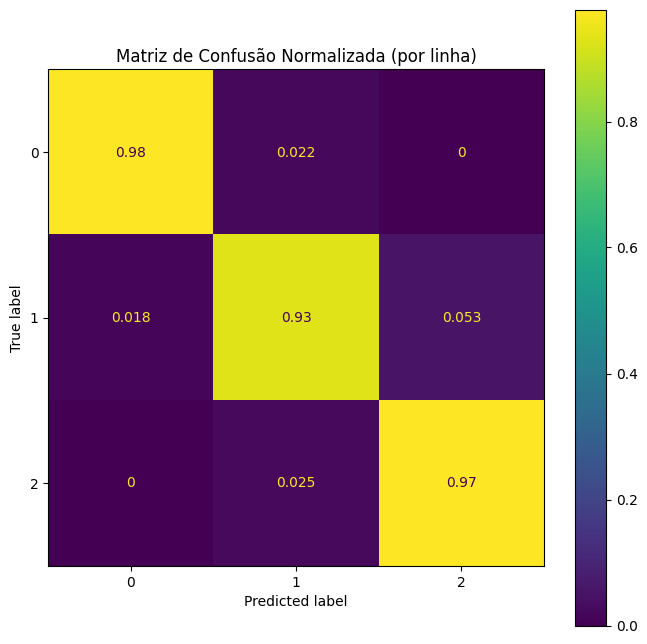

In [100]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt

# 1. Obter previsões com validação cruzada
y_train_pred_multi = cross_val_predict(sgd_clf_multiclasse, X_train_scaled, y_train, cv=3)

# 2. Plotar matriz de confusão normalizada
fig, ax = plt.subplots(figsize=(8, 8))
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred_multi, normalize='true', ax=ax)

plt.title("Matriz de Confusão Normalizada (por linha)")
plt.show()
